In [1]:
import argparse
import pdb
import logging

import numpy as np
from numpy import sqrt, exp, pi
from scipy.stats import norm
from scipy.special import erf
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

m0 0.38756407280978544
M0 0.3914776119980874


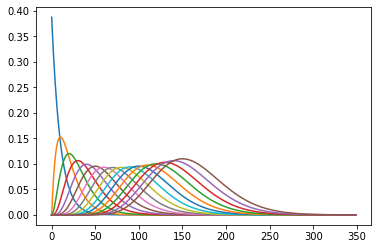

In [2]:
theta = 0.22
sigma = 0.1

P = 16
alpha = P/0.005/40000

tau = 10
T = 350

phif = lambda x: 0.5 * (1 + erf((x - theta) / (sqrt(2) * sigma)))
Gf = lambda x: exp(-theta**2 / (2 * (x))) / sqrt(2 * pi * (x))

m0 = norm.expect(lambda v: v * phif(v), scale=1)
M0 = norm.expect(lambda v: phif(v)**2, scale=1)

R0 = np.sqrt(alpha * M0) 
print("m0", m0)
print("M0", M0)

# Use average G (from 0 to retrieval time) from simulation
M1, m1 = np.load("data/data_b.npy", allow_pickle=True)[:2]
R1 = np.sqrt(np.sum(m1**2,axis=0) + alpha*M1)
G1 = Gf(R1**2 + sigma**2)
G1_mean = np.mean(G1[:m1[-1].argmax()])

def fun(t, m):
    J = -np.eye(P)
    diag = np.diagonal(J, offset=-1)
    diag.setflags(write=True)
    diag.fill(G1_mean)

    dm = J.dot(m) / tau

    return dm

t = np.arange(0,T,1)
m = np.zeros(P)

m[0] = m0
sol = solve_ivp(fun, t_span=(0,T), t_eval=t, y0=m)

overlap = sol.y
    
plt.figure()
for q in overlap:
    plt.plot(q)

In [4]:
np.save(open("data/data_a.npy", "wb"), [overlap, M0])